In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
airbnb_df = pd.read_csv("Airbnb NYC 2019.csv")
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
airbnb_df.shape

(48895, 16)

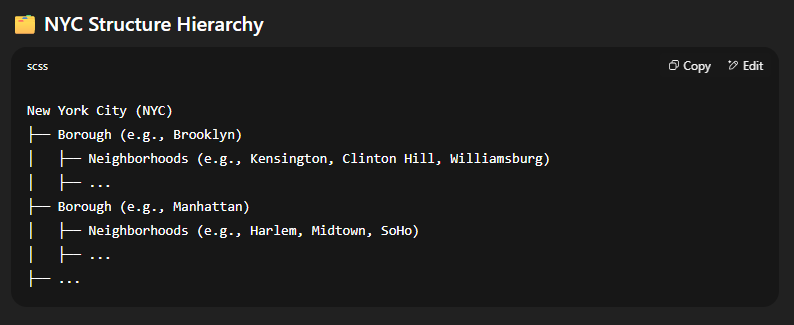

In [4]:
airbnb_df.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [5]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
rename_col = {"id" : "listing_id", "name" : "listing_name", "number_of_reviews" : "total_reviews", "calculated_host_listings_count" : "host_listings_count"}

In [7]:
airbnb_df = airbnb_df.rename(columns = rename_col)

In [8]:
airbnb_df.head(2)

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [9]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  last_review          38843 non-null  object 
 13  reviews_per_month    38843 non-null  float64
 14  host_listings_count  48895 non-null  int64  
 15  availability_365     48895 non-null 

In [10]:
airbnb_df = airbnb_df.drop_duplicates()
airbnb_df.count()

listing_id             48895
listing_name           48879
host_id                48895
host_name              48874
neighbourhood_group    48895
neighbourhood          48895
latitude               48895
longitude              48895
room_type              48895
price                  48895
minimum_nights         48895
total_reviews          48895
last_review            38843
reviews_per_month      38843
host_listings_count    48895
availability_365       48895
dtype: int64

In [11]:
airbnb_df.isnull().sum()

listing_id                 0
listing_name              16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

In [12]:
airbnb_df['listing_name'].fillna('Unknown', inplace = True)
airbnb_df['host_name'].fillna('no_name', inplace=True)

In [13]:
airbnb_df[['listing_name', 'host_name']].isnull().sum()

listing_name    0
host_name       0
dtype: int64

In [14]:
airbnb_df = airbnb_df.drop('last_review', axis = 1)

In [15]:
airbnb_df.shape

(48895, 15)

In [16]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48895 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48895 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  reviews_per_month    38843 non-null  float64
 13  host_listings_count  48895 non-null  int64  
 14  availability_365     48895 non-null  int64  
dtypes: float64(3), int64(7), object(5)
m

In [17]:
airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].replace(to_replace=np.nan, value=0).astype('float64')

In [18]:
airbnb_df['reviews_per_month'].isnull().sum()

0

In [19]:
airbnb_df.head(2)

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


In [20]:
airbnb_df.shape

(48895, 15)

In [21]:
airbnb_df['listing_id'].nunique()

48895

In [22]:
# 221 unique neighbourhood 
airbnb_df['neighbourhood'].nunique()

221

In [23]:
airbnb_df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [24]:
airbnb_df['listing_name'].nunique()

47906

In [25]:
airbnb_df[airbnb_df['host_name'] == 'David' ]['listing_name'].nunique()

402

In [26]:
airbnb_df[airbnb_df['listing_name'] == airbnb_df['host_name']].head()

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,0.25,1,25
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,0.15,1,238
16422,13186374,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,0.00,1,0
23996,19348168,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,0.10,1,0
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,0.08,18,90


In [27]:
# So, there are 5154 such hosts, who have listed more than one property

airbnb_df['host_id'].value_counts()[airbnb_df['host_id'].value_counts() > 1].count()

5154

In [28]:
airbnb_df['host_id'].value_counts()[airbnb_df['host_id'].value_counts() > 1].count()

5154

## Removal of Outliers 

In [29]:
airbnb_df.describe()

,listing_id,host_id,latitude,longitude,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


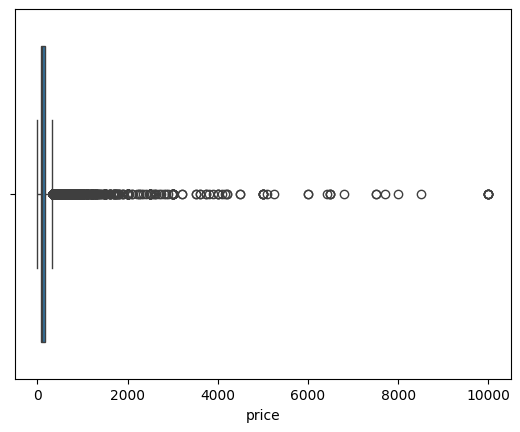

In [30]:
sns.boxplot(x = airbnb_df['price'])
plt.show()

In [31]:
# Writing IQR function to handle Outliers 

def iqr_technique(df_column):
    Q1 = np.percentile(df_column, 25)
    Q3 = np.percentile(df_column, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)

    return lower_range, upper_range

In [32]:
lower_bound,upper_bound = iqr_technique(airbnb_df['price'])

print(lower_bound)
print(upper_bound)

-90.0
334.0


In [33]:
airbnb_df = airbnb_df[(airbnb_df['price'] > lower_bound) & (airbnb_df['price'] < upper_bound)]

In [34]:
airbnb_df.shape

(45918, 15)

In [35]:
print(airbnb_df['price'].max())

333


### Data Visualization

<Axes: ylabel='Frequency'>

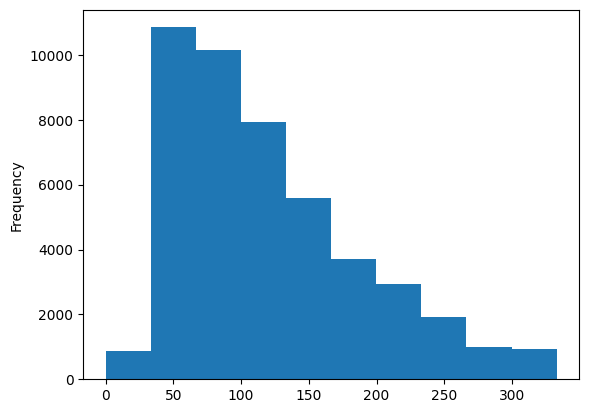

In [37]:
airbnb_df['price'].plot(kind = 'hist')

better plot

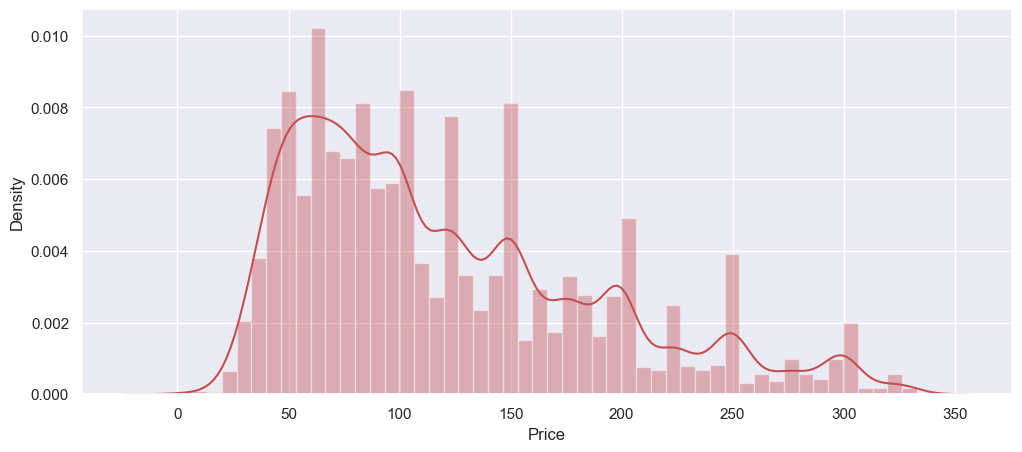

In [48]:
plt.figure(figsize=(12,5))
sns.set_theme(style='darkgrid')
sns.distplot(airbnb_df['price'], color=('r'))

plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


Observation:
- Range of prices $[30, 330]
- Majority prices $[50, 150]
- Only few listings for price range > $250

In [54]:
counts = airbnb_df['neighbourhood_group'].value_counts()
top_neighbouring_groups = counts.reset_index()
top_neighbouring_groups.columns = ['Neighbourhood_name', 'Listing_counts']
top_neighbouring_groups

,Neighbourhood_name,Listing_counts
0,Manhattan,19501
1,Brooklyn,19415
2,Queens,5567
3,Bronx,1070
4,Staten Island,365


In [51]:
top_neighbouring_groups['Listing_counts'].sum()

45918

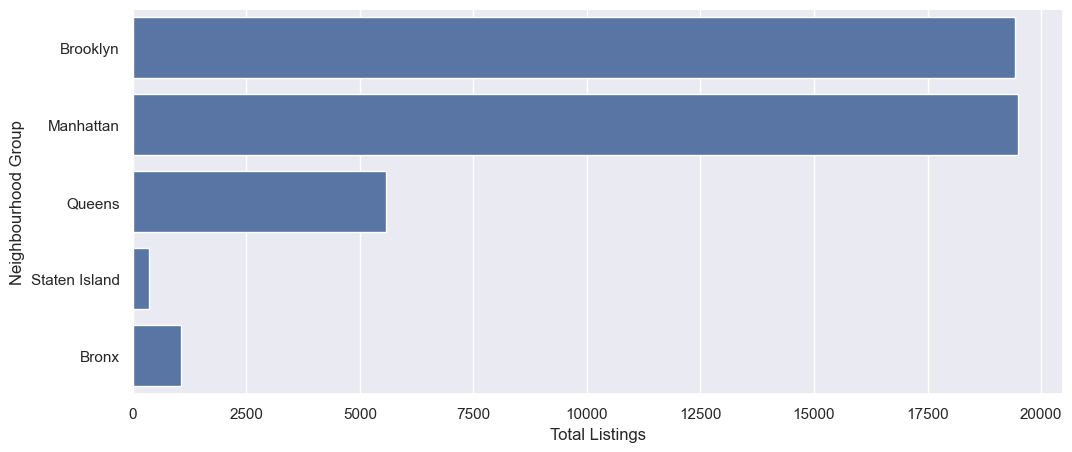

In [58]:
plt.figure(figsize=(12,5))
sns.countplot(airbnb_df['neighbourhood_group'])
plt.ylabel("Neighbourhood Group")
plt.xlabel("Total Listings")
plt.show()

Observations: 

Manhattan and Brooklyn have the highest number of listings on Airbnb, with over 19,000 listings each.

Queens and the Bronx have significantly fewer listings compared to Manhattan and Brooklyn, with 5,567 and 1,070 listings, respectively

Staten Island has the fewest number of listings, with only 365.

The distribution of listings across the different neighborhood groups is skewed, with a concentration of listings in Manhattan and Brooklyn.

Despite being larger in size, the neighborhoods in Queens, the Bronx, and Staten Island have fewer listings on Airbnb compared to Manhattan, which has a smaller geographical area.

This could suggest that the demand for Airbnb rentals is higher in Manhattan compared to the other neighborhoods, leading to a higher concentration of listings in this area.

Alternatively, it could be that the supply of listings is higher in Manhattan due to a higher number of homeowners or property owners in this neighborhood who are willing to list their properties on Airbnb.

In [65]:
airbnb_df.groupby("neighbourhood_group").mean(numeric_only = True)

,listing_id,host_id,latitude,longitude,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,
Bronx,2.275312e+07,1.061791e+08,40.848208,-73.884825,77.365421,4.598131,26.341121,1.498346,2.224299,164.564486
Brooklyn,1.824182e+07,5.637151e+07,40.684853,-73.950853,105.699614,6.021375,24.513830,1.060511,2.293999,98.500644
Manhattan,1.847232e+07,6.490953e+07,40.766662,-73.973519,145.904620,8.546331,21.954156,0.988768,11.969694,105.837701
Queens,2.174978e+07,9.614604e+07,40.731660,-73.872964,88.904437,5.072391,27.971798,1.582035,4.094665,143.019041
Staten Island,2.172860e+07,9.970187e+07,40.610503,-74.105723,89.235616,4.824658,31.605479,1.610630,2.334247,199.893151


In [ ]:
grouped = airbnb_df.groupby('neighbourhood_group').mean(numeric_only = True)
new_grouped = grouped.reset_index()
new_grouped = new_grouped.rename(columns= {"price" : "avg_price"})
new_grouped = round(new_grouped, 2)
new_grouped
new_grouped[['neighbourhood_group', 'avg_price']]

,neighbourhood_group,avg_price
0,Bronx,77.37
1,Brooklyn,105.70
2,Manhattan,145.90
3,Queens,88.90
4,Staten Island,89.24


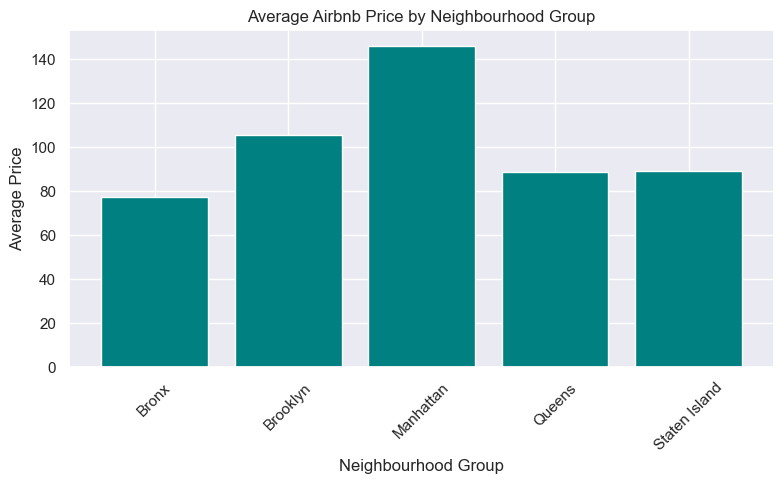

In [87]:
plt.figure(figsize=(8, 5))
plt.bar(new_grouped['neighbourhood_group'], new_grouped['avg_price'], color='teal')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.title('Average Airbnb Price by Neighbourhood Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Average Price by Neighbourhood Group')

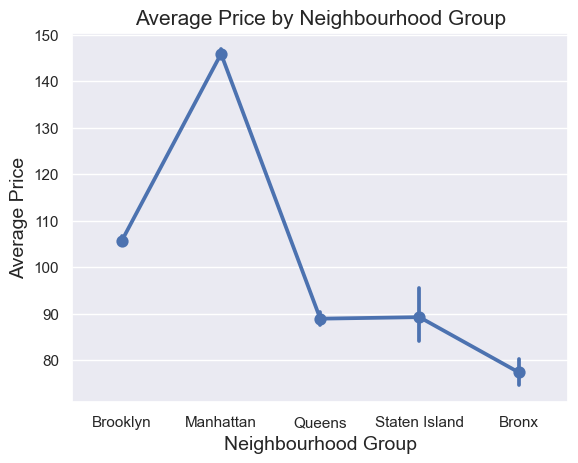

In [94]:
# Point plot 

from statistics import mean

sns.pointplot(x = 'neighbourhood_group', y = 'price', data = airbnb_df, estimator=np.mean)
plt.xlabel('Neighbourhood Group',fontsize=14)
plt.ylabel('Average Price',fontsize=14)
plt.title('Average Price by Neighbourhood Group',fontsize=15)
# plt.show()

In [97]:
airbnb_df.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             77.365421
Brooklyn         105.699614
Manhattan        145.904620
Queens            88.904437
Staten Island     89.235616
Name: price, dtype: float64

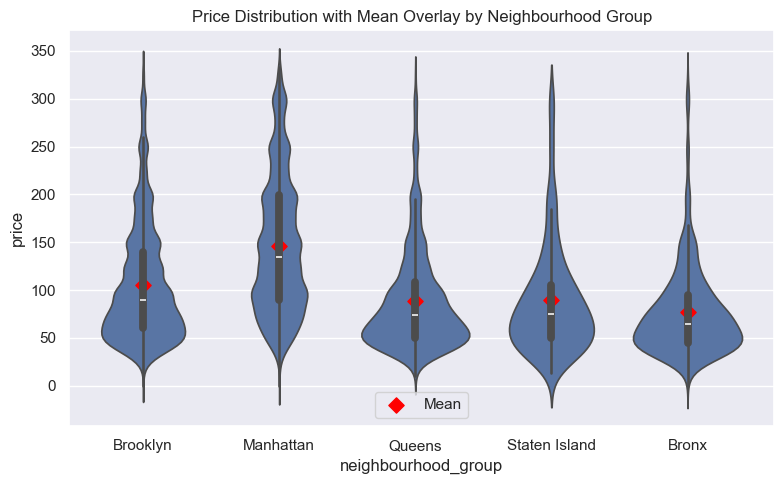

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get the correct order from the plot or your dataset
category_order = airbnb_df['neighbourhood_group'].unique()

# Step 2: Get mean prices, aligned in the same order
group_means = airbnb_df.groupby('neighbourhood_group')['price'].mean().reindex(category_order)

# Step 3: Plot the violin plot with specified order
plt.figure(figsize=(8,5))
sns.violinplot(data=airbnb_df, x='neighbourhood_group', y='price', inner='box', order=category_order)

# Step 4: Plot the aligned means
for i, mean in enumerate(group_means):
    plt.scatter(i, mean, color='red', marker='D', s=60, label='Mean' if i == 0 else "")

plt.legend()
plt.title("Price Distribution with Mean Overlay by Neighbourhood Group")
plt.tight_layout()
plt.show()


Observations 

price distribution is very high in Manhattan and Brooklyn. but Manhattan have more Diversity in price range, you can see in violin plot.

Queens and Bronx have same price distribution but in Queens area more distribution in 50
 but diversity in price is not like Manhattan and Brooklyn.

In [115]:
airbnb_df['neighbourhood'].value_counts()[:10]

neighbourhood
Williamsburg          3732
Bedford-Stuyvesant    3638
Harlem                2585
Bushwick              2438
Upper West Side       1788
Hell's Kitchen        1731
East Village          1714
Upper East Side       1670
Crown Heights         1519
Midtown               1143
Name: count, dtype: int64

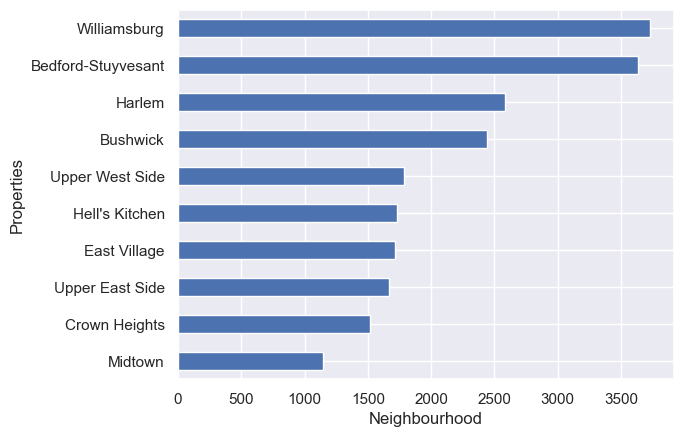

In [124]:
top_10_neighbourhoods = airbnb_df['neighbourhood'].value_counts().nlargest(10)
top_10_neighbourhoods.plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.xlabel('Neighbourhood')
plt.ylabel('Properties')
plt.show()

In [131]:
temp_df = airbnb_df[airbnb_df['neighbourhood'] == 'Williamsburg']
temp_df.head(2)


,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
15,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,1.20,1,46
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,0.07,1,0


In [134]:
temp_df['neighbourhood_group'].value_counts()

neighbourhood_group
Brooklyn    3732
Name: count, dtype: int64

In [135]:
# Step 1: Get top 10 neighbourhoods by number of listings
top_10_neigh = airbnb_df['neighbourhood'].value_counts().nlargest(10).index

# Step 2: Filter DataFrame for only those top 10 neighbourhoods
filtered_df = airbnb_df[airbnb_df['neighbourhood'].isin(top_10_neigh)]

# Step 3: Group by neighbourhood and neighbourhood_group, and count
result = filtered_df.groupby(['neighbourhood', 'neighbourhood_group']).size().unstack(fill_value=0)

# Display result
print(result)


neighbourhood_group  Brooklyn  Manhattan
neighbourhood                           
Bedford-Stuyvesant       3638          0
Bushwick                 2438          0
Crown Heights            1519          0
East Village                0       1714
Harlem                      0       2585
Hell's Kitchen              0       1731
Midtown                     0       1143
Upper East Side             0       1670
Upper West Side             0       1788
Williamsburg             3732          0


Observation: 

- The top 10 neighbourhoods that we had are in Brooklyn and Manhattan

In [140]:
airbnb_df.groupby('neighbourhood_group')['neighbourhood'].nunique()

neighbourhood_group
Bronx            48
Brooklyn         47
Manhattan        32
Queens           51
Staten Island    41
Name: neighbourhood, dtype: int64

In [142]:
airbnb_df['neighbourhood'].nunique()

219

#### Top Hosts with maximum number of listings 

In [206]:
# Checking if a name of person has multiple id's - it means that there can be multiple people in the dataset but will have different host_id

airbnb_df.groupby('host_name')['host_id'].nunique().sort_values(ascending = False).head(10)

host_name
Michael    312
David      293
Alex       202
Daniel     197
Sarah      195
John       176
Maria      155
Andrew     150
Chris      150
Anna       149
Name: host_id, dtype: int64

Observation : 
This means there are 312 different Michaels 

- So in order to see which person has the max properties listed, we will have to make use of host_id as unique identifier

In [161]:
airbnb_df['host_id'].nunique()

35388

In [183]:
top_hosts = airbnb_df['host_id'].value_counts().head(10)

In [190]:
top_hosts_df  = top_hosts.reset_index()

In [191]:
top_hosts_df.columns = ['host_id', 'listing_count']
top_hosts_df

,host_id,listing_count
0,219517861,272
1,107434423,176
2,137358866,103
3,30283594,95
4,12243051,95
5,61391963,91
6,16098958,90
7,22541573,87
8,1475015,52
9,7503643,52


In [192]:
host_names = airbnb_df.drop_duplicates(subset='host_id')[['host_id', 'host_name']]

In [194]:
final_df = pd.merge(top_hosts_df, host_names, on='host_id', how='left')
final_df

,host_id,listing_count,host_name
0,219517861,272,Sonder (NYC)
1,107434423,176,Blueground
2,137358866,103,Kazuya
3,30283594,95,Kara
4,12243051,95,Sonder
5,61391963,91,Corporate Housing
6,16098958,90,Jeremy & Laura
7,22541573,87,Ken
8,1475015,52,Mike
9,7503643,52,Vida


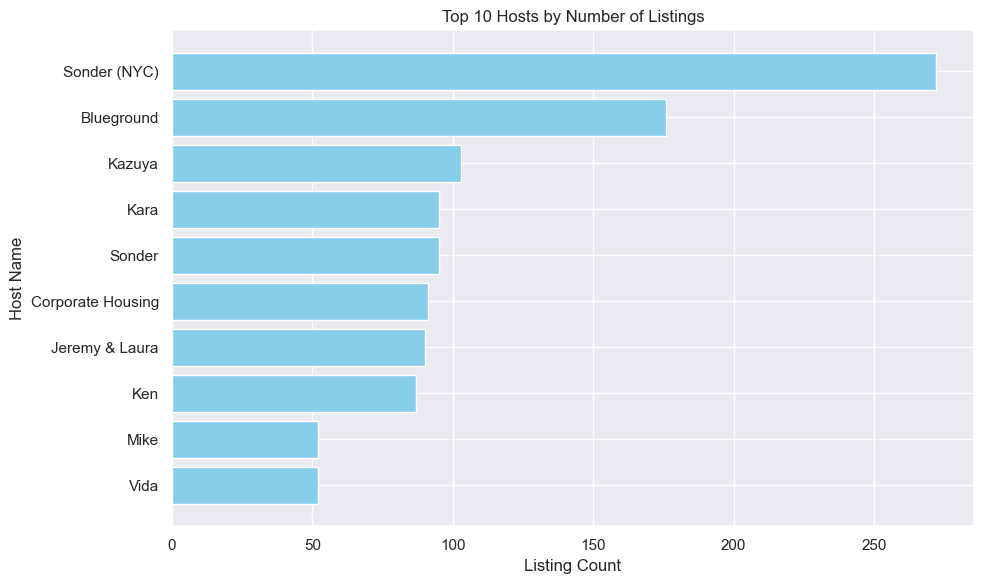

In [199]:
plt.figure(figsize=(10,6))
plt.barh(final_df['host_name'], final_df['listing_count'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Listing Count')
plt.ylabel('Host Name')
plt.title('Top 10 Hosts by Number of Listings')
plt.tight_layout()
plt.show()

#### Number Of Active Hosts Per Location Using Line Chart

In [211]:
hosts_per_location = airbnb_df.groupby('neighbourhood_group')['listing_id'].count().reset_index()
hosts_per_location

,neighbourhood_group,listing_id
0,Bronx,1070
1,Brooklyn,19415
2,Manhattan,19501
3,Queens,5567
4,Staten Island,365


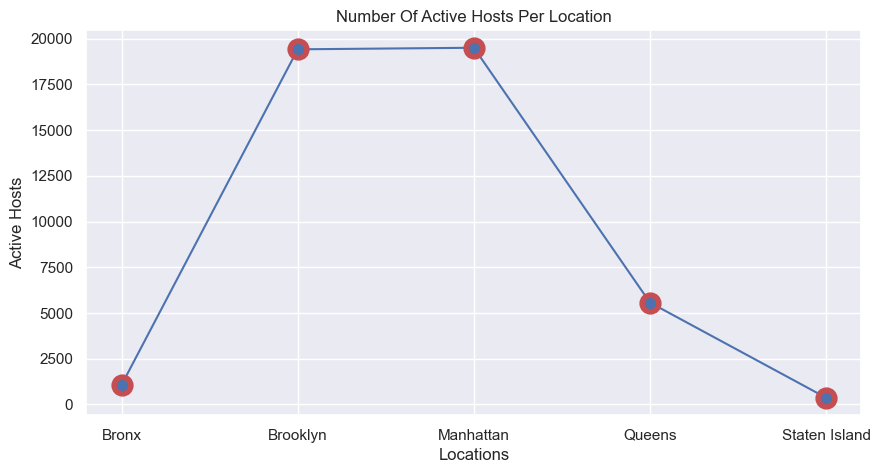

In [215]:
hosts_per_location = airbnb_df.groupby('neighbourhood_group')['listing_id'].count()
locations = hosts_per_location.index
host_counts = hosts_per_location.values

plt.figure(figsize=(10,5))
plt.plot(locations, host_counts, marker='o', ms=12, mew=4, mec='r')

plt.title("Number Of Active Hosts Per Location")
plt.xlabel("Locations")
plt.ylabel("Active Hosts")
plt.show()

### Observations 

Manhattan has the largest number of hosts with 19501,Brooklyn has the second largest number of hosts with 19415.

After that Queens with 5567 and the Bronx with 1070. while Staten Island has the fewest with 365.

Brooklyn and Manhattan have the largest number of hosts, with more than double the number of hosts in Queens and more than 18 times the number of hosts in the Bronx.

#### Average Minimum Price In Neighborhoods using Scatter and Bar chart

In [226]:
neighbourhood_avg_price = airbnb_df.groupby('neighbourhood').mean(numeric_only = True)['price'].reset_index().sort_values('price').head(10)
neighbourhood_avg_price

,neighbourhood,price
27,Bull's Head,47.333333
101,Hunts Point,50.500000
195,Tremont,51.545455
178,Soundview,53.466667
50,Corona,54.412698
140,New Dorp,57.000000
24,Bronxdale,57.105263
141,New Dorp Beach,57.400000
87,Grant City,57.666667
46,Concord,58.192308


In [234]:
neighbourhood_avg_price_with_group = neighbourhood_avg_price.join(airbnb_df[['neighbourhood', 'neighbourhood_group']].drop_duplicates().set_index('neighbourhood'), on='neighbourhood')

In [235]:
neighbourhood_avg_price_with_group

,neighbourhood,avg_price,neighbourhood_group
27,Bull's Head,47.333333,Staten Island
101,Hunts Point,50.500000,Bronx
195,Tremont,51.545455,Bronx
178,Soundview,53.466667,Bronx
50,Corona,54.412698,Queens
140,New Dorp,57.000000,Staten Island
24,Bronxdale,57.105263,Bronx
141,New Dorp Beach,57.400000,Staten Island
87,Grant City,57.666667,Staten Island
46,Concord,58.192308,Staten Island


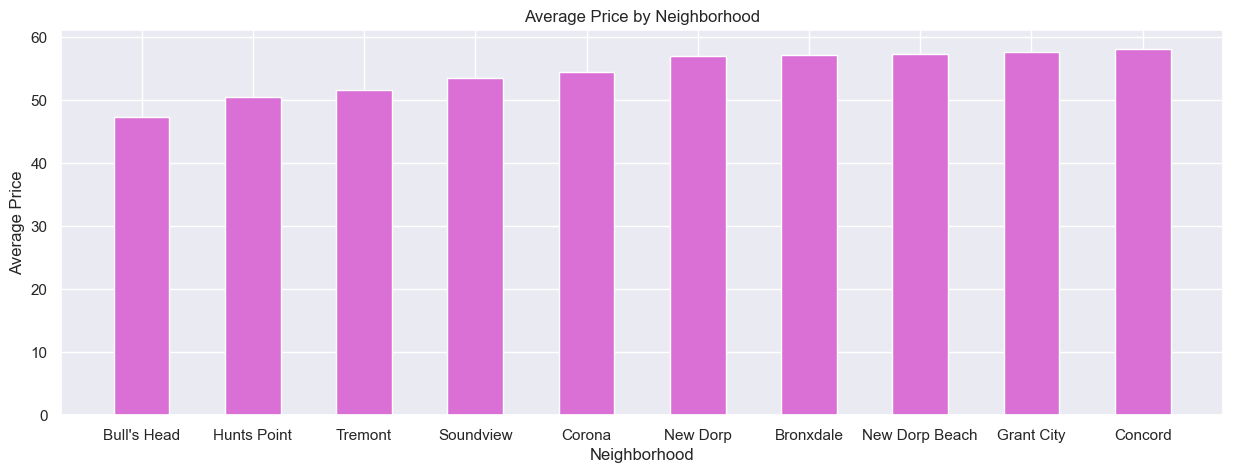

In [261]:
# Extract the values from the dataset
neighborhoods = neighbourhood_avg_price_with_group['neighbourhood']
prices = neighbourhood_avg_price_with_group['avg_price']

# Create the bar plot
plt.figure(figsize=(15,5))
plt.bar(neighborhoods, prices,width=0.5, color = 'orchid')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Average Price by Neighborhood')

plt.show()

In [256]:

# neighbourhood_avg_price = airbnb_df.groupby('neighbourhood').mean(numeric_only = True)['price'].reset_index().sort_values(by = 'price')
# neighbourhood_avg_price

neighbourhood_avg_price = airbnb_df.groupby("neighbourhood")["price"].mean()
neighbourhood_avg_price

neighbourhood
Allerton            78.756098
Arden Heights       67.250000
Arrochar            89.500000
Arverne            135.097222
Astoria             96.747463
                      ...    
Willowbrook        249.000000
Windsor Terrace    127.046667
Woodhaven           67.170455
Woodlawn            60.090909
Woodside            78.562771
Name: price, Length: 219, dtype: float64

In [257]:
neighbourhood_prices = pd.DataFrame({"neighbourhood": neighbourhood_avg_price.index, "avg_price": neighbourhood_avg_price.values})
neighbourhood_prices

,neighbourhood,avg_price
0,Allerton,78.756098
1,Arden Heights,67.250000
2,Arrochar,89.500000
3,Arverne,135.097222
4,Astoria,96.747463
...,...,...
214,Willowbrook,249.000000
215,Windsor Terrace,127.046667
216,Woodhaven,67.170455
217,Woodlawn,60.090909


In [258]:
df = airbnb_df.merge(neighbourhood_prices, on='neighbourhood')
df.head()

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365,avg_price
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,86.255814
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,180.948381
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,103.536944
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,123.902439
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,112.360701


<Axes: title={'center': 'Average Airbnb Price by Neighborhoods in New York City'}, xlabel='longitude', ylabel='latitude'>

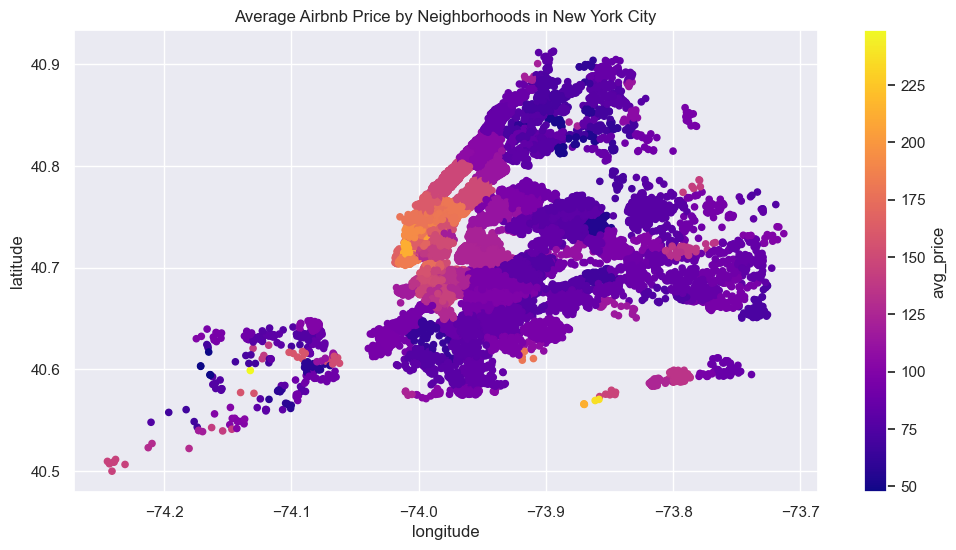

In [260]:
fig = df.plot.scatter(x = 'longitude', y = 'latitude', c = 'avg_price', title="Average Airbnb Price by Neighborhoods in New York City", figsize=(12,6), cmap="plasma")
fig

In [275]:
# Group by 'neighbourhood_group' and aggregate unique neighbourhoods as lists
neighbourhoods_per_group = airbnb_df.groupby('neighbourhood_group')['neighbourhood'].unique()

# Convert to a DataFrame for better display
neighbourhoods_df = neighbourhoods_per_group.reset_index()
neighbourhoods_df.columns = ['neighbourhood_group', 'neighbourhoods']

# Display the result
neighbourhoods_df

,neighbourhood_group,neighbourhoods
0,Bronx,"[Highbridge, Clason Point, Eastchester, Kingsb..."
1,Brooklyn,"[Kensington, Clinton Hill, Bedford-Stuyvesant,..."
2,Manhattan,"[Midtown, Harlem, East Harlem, Murray Hill, He..."
3,Queens,"[Long Island City, Woodside, Flushing, Sunnysi..."
4,Staten Island,"[St. George, Tompkinsville, Emerson Hill, Shor..."
